<a href="https://colab.research.google.com/github/GabrielMtzSoltero/wsEMBS/blob/main/workshopEMBS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar los paquetes necesarios



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [ ]:
import os
os.getcwd()

'/content'

# Leer el archivo CSV

In [ ]:
dataFilePath = 'sample_data/kmer_encoding2.csv'
df = pd.read_csv(dataFilePath)

# Revisar alguna propiedades del dataset

In [ ]:
df.head()

,Unnamed: 0,kmer_id,kmer_encode_1,kmer_encode_2,kmer_encode_3,kmer_encode_4,kmer_encode_5,kmer_encode_6,kmer_encode_7,kmer_encode_8,kmer_encode_9,kmer_encode_10,kmer_encode_11,kmer_encode_12,kmer_encode_13,kmer_gocom_id_fk,target
0,0,1101106,2,6,5,2,8,10,2,12,14,2,6,5,10,3964,1
1,1,1101126,6,5,10,8,5,10,8,5,11,8,9,6,2,3964,1
2,2,1101129,8,5,10,8,5,11,8,9,6,2,4,3,10,3964,1
3,3,1101132,8,5,11,8,9,6,2,4,3,10,9,3,10,3964,1
4,4,1101136,9,6,2,4,3,10,9,3,10,9,10,2,7,3964,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3366 entries, 0 to 3365
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        3366 non-null   int64
 1   kmer_id           3366 non-null   int64
 2   kmer_encode_1     3366 non-null   int64
 3   kmer_encode_2     3366 non-null   int64
 4   kmer_encode_3     3366 non-null   int64
 5   kmer_encode_4     3366 non-null   int64
 6   kmer_encode_5     3366 non-null   int64
 7   kmer_encode_6     3366 non-null   int64
 8   kmer_encode_7     3366 non-null   int64
 9   kmer_encode_8     3366 non-null   int64
 10  kmer_encode_9     3366 non-null   int64
 11  kmer_encode_10    3366 non-null   int64
 12  kmer_encode_11    3366 non-null   int64
 13  kmer_encode_12    3366 non-null   int64
 14  kmer_encode_13    3366 non-null   int64
 15  kmer_gocom_id_fk  3366 non-null   int64
 16  target            3366 non-null   int64
dtypes: int64(17)
memory usage: 447.2 

In [ ]:
df.describe()

,Unnamed: 0,kmer_id,kmer_encode_1,kmer_encode_2,kmer_encode_3,kmer_encode_4,kmer_encode_5,kmer_encode_6,kmer_encode_7,kmer_encode_8,kmer_encode_9,kmer_encode_10,kmer_encode_11,kmer_encode_12,kmer_encode_13,kmer_gocom_id_fk,target
count,3366.00000,3.366000e+03,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000,3366.000000
mean,1682.50000,1.239964e+06,6.693702,6.722816,6.460784,6.559715,6.631016,6.609626,6.611705,6.687166,6.661022,6.477718,6.603981,7.271242,7.035948,4110.583185,0.324718
std,971.82483,1.344211e+05,3.269346,2.888847,3.154672,3.200181,3.104027,3.194956,3.197952,3.124917,3.193894,3.251418,3.339934,3.295066,3.282565,173.983945,0.468339
min,0.00000,1.101106e+06,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3964.000000,0.000000
25%,841.25000,1.143716e+06,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,3995.000000,0.000000
50%,1682.50000,1.145964e+06,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,8.000000,8.000000,3995.000000,0.000000
75%,2523.75000,1.287826e+06,10.000000,9.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4134.000000,1.000000
max,3365.00000,1.513873e+06,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,4496.000000,1.000000


In [ ]:
y=df['target']
y

0       1
1       1
2       1
3       1
4       1
       ..
3361    0
3362    0
3363    0
3364    0
3365    0
Name: target, Length: 3366, dtype: int64

In [ ]:
X = df.drop(["Unnamed: 0","kmer_id","kmer_gocom_id_fk","target"], axis = 1)
X

,kmer_encode_1,kmer_encode_2,kmer_encode_3,kmer_encode_4,kmer_encode_5,kmer_encode_6,kmer_encode_7,kmer_encode_8,kmer_encode_9,kmer_encode_10,kmer_encode_11,kmer_encode_12,kmer_encode_13
0,2,6,5,2,8,10,2,12,14,2,6,5,10
1,6,5,10,8,5,10,8,5,11,8,9,6,2
2,8,5,10,8,5,11,8,9,6,2,4,3,10
3,8,5,11,8,9,6,2,4,3,10,9,3,10
4,9,6,2,4,3,10,9,3,10,9,10,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3361,8,9,11,8,9,6,6,5,11,8,9,8,8
3362,9,11,8,9,6,6,5,11,8,9,8,8,7
3363,6,6,5,11,8,9,8,8,7,3,10,9,8
3364,5,11,8,9,8,8,7,3,10,9,8,8,7


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model=MLPClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [ ]:
print("score train ",model.score(X_train, y_train))
print("score_test ",model.score(X_test, y_test))

score train  0.9853658536585366
score_test  0.954995499549955


# chequemos el minMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[0, 0], [2, 1], [1, 1], [1, 1]]
scaler = MinMaxScaler()
scaler.fit(data)
print(scaler.transform(data))
print(scaler.transform([[2, 2]]))

[[0.  0. ]
 [1.  1. ]
 [0.5 1. ]
 [0.5 1. ]]
[[1. 2.]]


In [ ]:
#creamos el escalador
scaler = MinMaxScaler()
scaledXDF=X.copy()
#escalar los valores de entradas
scaledXDF[X.columns]=scaler.fit_transform(X)
#SPlitting into train and test
X_trainMM, X_testMM, y_train, y_test = train_test_split(scaledXDF, y, test_size = 0.33, random_state=1)
#creamos el modelo de un Perceptron multicapa
model2=MLPClassifier(alpha=1, max_iter=1000)
#a entrenar
model2.fit(X_trainMM, y_train)
print("score train ",model2.score(X_trainMM, y_train))
print("score_test ",model2.score(X_testMM, y_test))

score train  0.9352549889135255
score_test  0.9171917191719172


<Axes: >

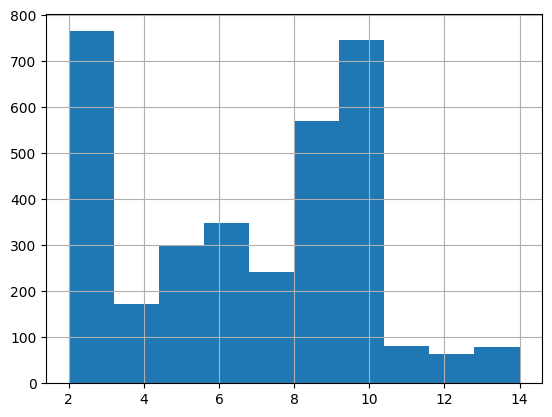

In [ ]:
X['kmer_encode_1'].hist()

(3366, 1)


,kmer_encode_1_std
count,3.366000e+03
mean,-6.755011e-17
std,1.000149e+00
min,-1.435883e+00
25%,-8.240493e-01
50%,9.370187e-02
75%,1.011453e+00
max,2.235121e+00


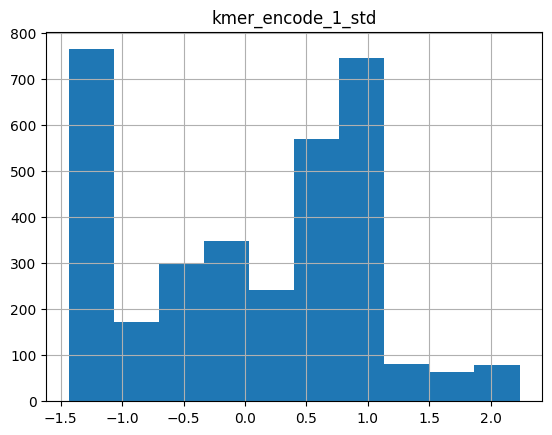

In [ ]:
from sklearn.preprocessing import StandardScaler
X.kmer_encode_1.shape

data =X['kmer_encode_1'].copy()
data=data.values.reshape(-1,1)
print(data.shape)
scalerS = StandardScaler()
scalerS.fit(data)
dataNew=scalerS.transform(data)
df2 = pd.DataFrame(dataNew, columns = ['kmer_encode_1_std'])

df2.hist()
df2.describe()

In [ ]:
#creamos el escalador
scalerS = StandardScaler()
scaledXDF=X.copy()
scaledXDF[X.columns]=scalerS.fit_transform(X)
#SPlitting into train and test
X_trainS, X_testS, y_train, y_test = train_test_split(scaledXDF, y, test_size = 0.33, random_state=1)
#creamos el modelo de un Perceptron multicapa
model3=MLPClassifier(alpha=1, max_iter=1000)
#a entrenar
model3.fit(X_trainS, y_train)
print("score train ",model3.score(X_trainS, y_train))
print("score_test ",model3.score(X_testS, y_test))

score train  0.9844789356984479
score_test  0.9711971197119712


In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_pred=model.predict(X_test)
y_predMM=model2.predict(X_testMM)
y_predS=model3.predict(X_testS)

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       731
           1       0.94      0.93      0.93       380

    accuracy                           0.95      1111
   macro avg       0.95      0.95      0.95      1111
weighted avg       0.95      0.95      0.95      1111



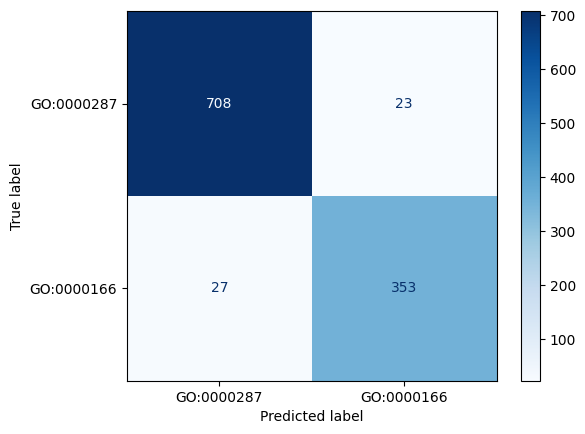

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=["GO:0000287","GO:0000166"])
print(classification_report(y_test, y_pred))
disp.plot(cmap=plt.cm.Blues)



              precision    recall  f1-score   support

           0       0.93      0.94      0.93       731
           1       0.87      0.86      0.87       380

    accuracy                           0.91      1111
   macro avg       0.90      0.90      0.90      1111
weighted avg       0.91      0.91      0.91      1111



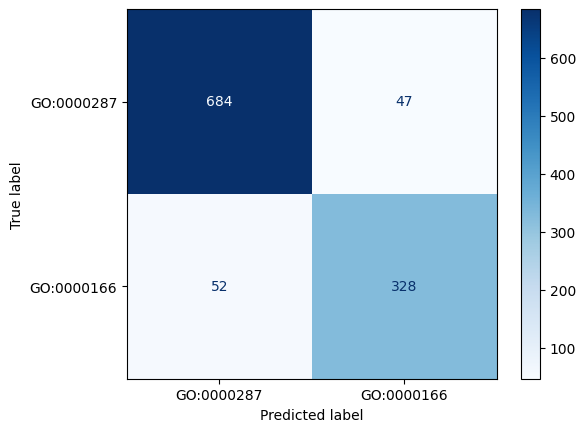

In [ ]:
cm = confusion_matrix(y_test, y_predMM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=["GO:0000287","GO:0000166"])
disp.plot(cmap=plt.cm.Blues)
print(classification_report(y_test, y_predMM))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       731
           1       0.95      0.97      0.96       380

    accuracy                           0.97      1111
   macro avg       0.97      0.97      0.97      1111
weighted avg       0.97      0.97      0.97      1111



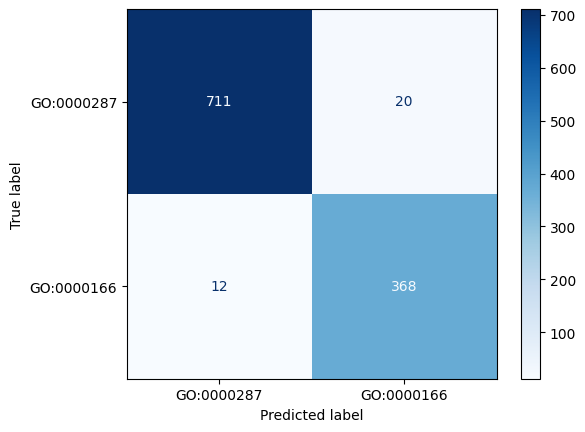

In [ ]:
cm = confusion_matrix(y_test, y_predS)
disp = ConfusionMatrixDisplay(confusion_matrix=cm ,display_labels=["GO:0000287","GO:0000166"])
print(classification_report(y_test, y_predS))
disp.plot(cmap=plt.cm.Blues)